### Student Information
Name: 何品萱

Student ID: 111065512

GitHub ID: piinshiuan

Kaggle name: wucall_

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2022-Lab2-master Repo](https://github.com/keziatamus/DM2022-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm2022-isa5810-lab2-homework) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/2b0d14a829f340bc88d2660dc602d4bd. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Nov. 22th 11:59 pm, Tuesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 25th 11:59 pm, Friday)__. 

## First Part

In [9]:
import pandas as pd
import numexpr
from pandas.core.computation.check import NUMEXPR_INSTALLED

# Load emotion training data 
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# Combine training data
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [10]:
# Load emotion testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# Combine testing data
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

In [11]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [13]:
print('Shape of Training df: ', train_df.shape)
print('Shape of Testing df: ', test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


In [14]:
train_df

,id,text,emotion,intensity
3182,40355,We want to help you with your #depression. Giv...,sadness,0.521
901,20044,#AnthonyWeiner #DISTRACTION #what is really go...,fear,0.854
1470,20613,@kevinrouth Now that's what I call a gameface!...,fear,0.458
344,10344,That AK47 leave your spine with a frown,anger,0.521
2509,30505,I'm really hitting all flavors of my sparkling...,joy,0.420
...,...,...,...,...
3177,40350,So now... yeah. I'm home again.\nStill feeling...,sadness,0.521
732,10732,"#Zumba, #PiYo and #HIIT sessions. Sweaty, burn...",anger,0.333
680,10680,@PerfectQuartz She's jogging a bit to stay bes...,anger,0.375
3179,40352,@fitzstockcharts Gundlach calling for rounding...,sadness,0.521


### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# Word frequency
from sklearn.feature_extraction.text import CountVectorizer

# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 
BOW_vectorizer.fit(train_df['text'])
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [17]:
# Compute the term frequency
import numpy as np
train_frequencies = np.asarray(train_data_BOW_features.sum(axis=0))[0]
test_frequencies = np.asarray(test_data_BOW_features.sum(axis=0))[0]

In [18]:
import seaborn as sns
sns.set(font_scale = 3)

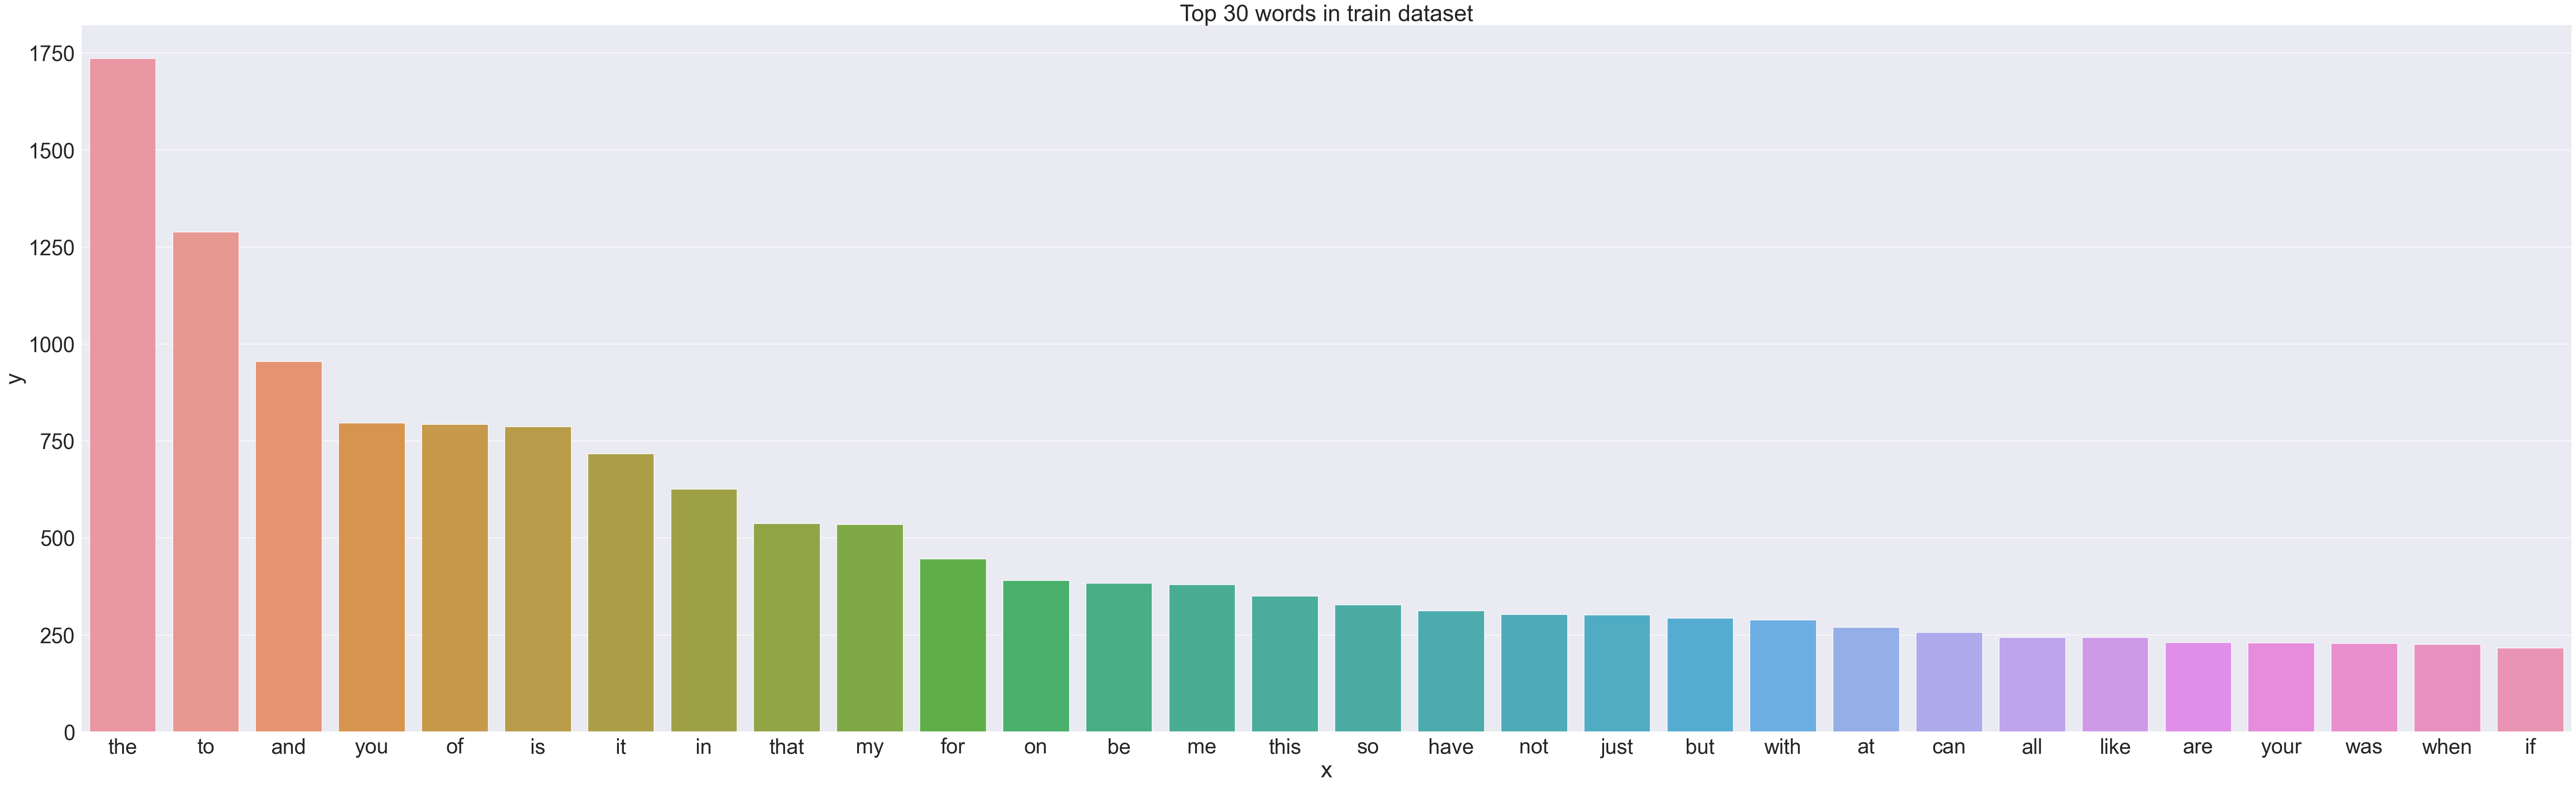

In [19]:
# Plot the training dataset top 30 words

d = {'x': BOW_vectorizer.get_feature_names_out(), 'y': train_frequencies}
df = pd.DataFrame(data=d)
# Sort the term frequency in descending order
df = df.sort_values(by=['y'], ascending=False)
plt.subplots(figsize=(70, 20))
plt.title('Top 30 words in train dataset')

g = sns.barplot(data=df[:30], x='x', y='y')

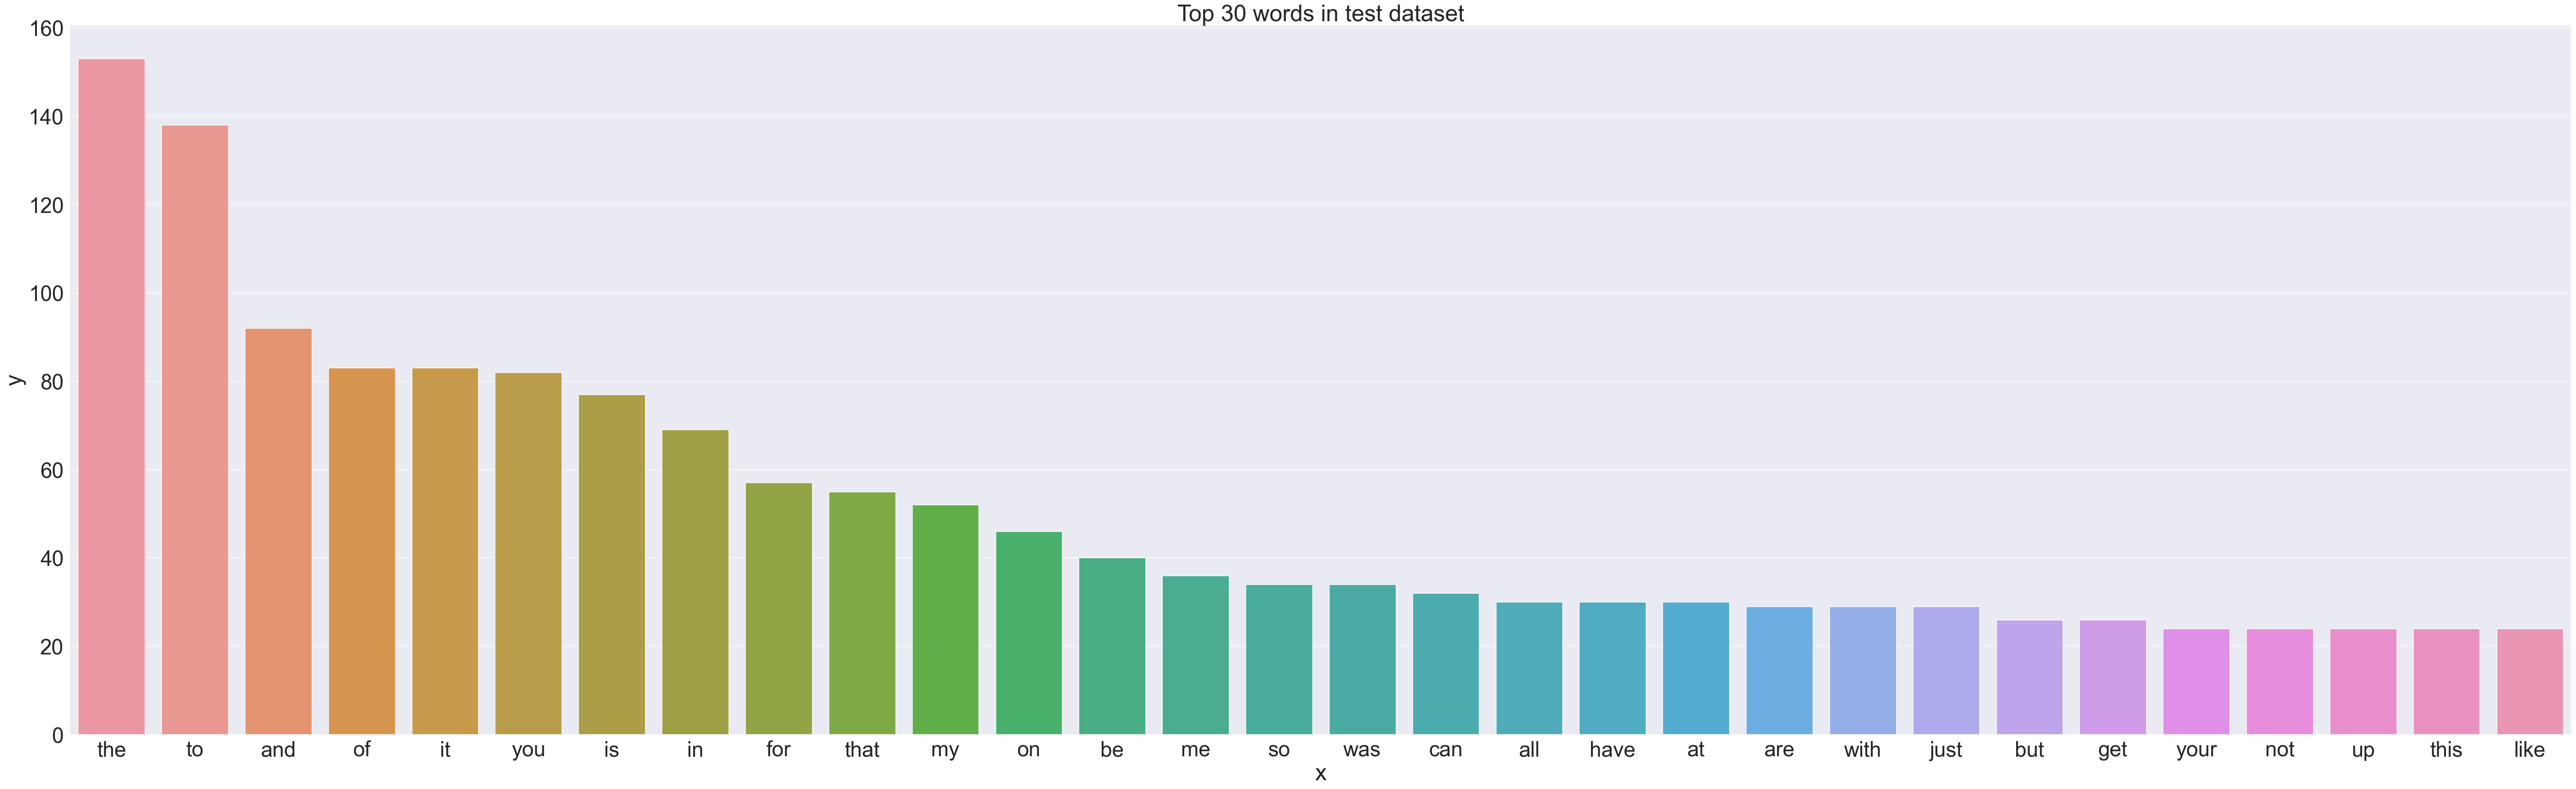

In [20]:
# Plot the testing dataset top 30 words

d = {'x': BOW_vectorizer.get_feature_names_out(), 'y': test_frequencies}
df = pd.DataFrame(data=d)
# Sort the term frequency in descending order
df = df.sort_values(by=['y'], ascending=False)
plt.subplots(figsize=(70, 20))
plt.title('Top 30 words in test dataset')
g = sns.barplot(data=df[:30], x='x', y='y')

### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [21]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
# Using TF-IDF vectorizer with 1000 features
tfidf_vect = TfidfVectorizer(max_features=1000)  
train_data_tfidf_features = tfidf_vect.fit_transform(train_df['text'])

In [23]:
feature_names_1000 = tfidf_vect.get_feature_names_out()
# Show feature names for feature 100-110
feature_names_1000[100:110]

array(['bitter', 'black', 'blacks', 'blame', 'blessed', 'blood', 'bloody',
       'blues', 'body', 'boiling'], dtype=object)

### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize, token_pattern=None) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

# data dimension
print('-- Data Dimension --')
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

# build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

# training
DT_model = DT_model.fit(X_train, y_train)

# predict
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

# Accuracy
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('\n -- Result of using Decision Tree model --')
print('Training accuracy: {}'.format(round(acc_train, 2)))
print('Testing accuracy: {}'.format(round(acc_test, 2)))

# precision, recall, f1-score
print('\n -- Classification report of using testing dataset --')
print(classification_report(y_true=y_test, y_pred=y_test_pred))

# check by confusion matrix
print('\n -- Confusion matrix of using testing dataset --')
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

-- Data Dimension --
X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)

 -- Result of using Decision Tree model --
Training accuracy: 0.99
Testing accuracy: 0.68

 -- Classification report of using testing dataset --
              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347


 -- Confusion matrix of using testing dataset --
[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
sns.set(font_scale = 1)

# Funciton for visualizing confusion_matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

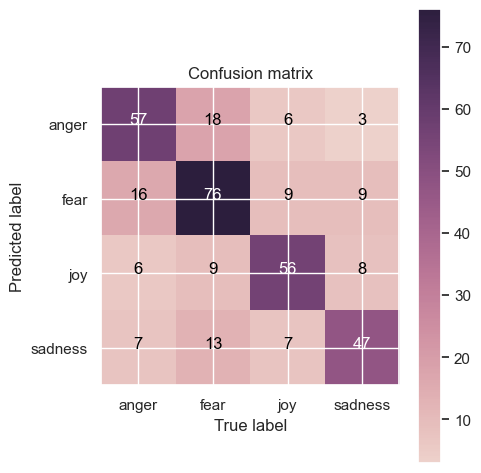

In [31]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

### My Idea

Confusion matrix allows us to observe the result of measure the recall, precision score in different classes and also know which classes model is repeatedly confusing in. For example, we can observe that for anger data(True label=anger), the model will predict the label to be 'anger' the most, the second will be 'fear'. And for fear data, the model will predict the label to be 'fear' the most, the second will be 'anger'. So we could say emotion of anger and fear is more confusing for the model(Easy to predict wrong). It's more difficult to distinguish it.

### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

In [32]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [33]:
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('-- Result of using Naive Bayes model --')
print('Training accuracy: {}'.format(round(acc_train, 2)))
print('Testing accuracy: {}'.format(round(acc_test, 2)))
print('\n-- Classification report of testing dataset --')
print(classification_report(y_true=y_test, y_pred=y_test_pred))

print('\n -- Confusion Matrix of testing dataset --')
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

-- Result of using Naive Bayes model --
Training accuracy: 0.79
Testing accuracy: 0.7

-- Classification report of testing dataset --
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347


 -- Confusion Matrix of testing dataset --
[[55 15  5  9]
 [ 9 85  5 11]
 [11  6 56  6]
 [12 10  6 46]]


### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

### My Idea

The final result of Naive bayes model is slightly better than Decision tree model. Since a Naive Bayes text classifier is based on the Bayes's Theorem, which compute the conditional probabilities of occurrence of two events based on the probabilities of occurrence of each individual event, encoding those probabilities is extremely useful in NLP task. And Decision tree is not suitable for high dimensional data. These reasons may contribute to the final result.

### ** >>> Exercise 6 (Take home): **  

In [57]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

# data dimension
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [58]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train.iloc[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 3182    sadness
901        fear
1470       fear
344       anger
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


In [59]:
# Data input output check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [60]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense_3 (Dense)             (None, 64)                32064     
                                                                 
 re_lu_2 (ReLU)              (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_3 (ReLU)              (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 4)                 260       
                                                                 
 softmax_1 (Softmax)         (None, 4)                 0   

In [61]:
from keras.callbacks import CSVLogger
import warnings
warnings.filterwarnings('ignore')

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 [==============================] - 1s 3ms/step - loss: 1.3279 - accuracy: 0.3587 - val_loss: 1.2801 - val_accuracy: 0.3746
Epoch 2/25
113/113 [==============================] - 0s 2ms/step - loss: 0.9938 - accuracy: 0.6247 - val_loss: 0.9570 - val_accuracy: 0.6398
Epoch 3/25
113/113 [==============================] - 0s 2ms/step - loss: 0.5913 - accuracy: 0.7960 - val_loss: 0.7702 - val_accuracy: 0.7003
Epoch 4/25
113/113 [==============================] - 0s 2ms/step - loss: 0.4116 - accuracy: 0.8450 - val_loss: 0.7778 - val_accuracy: 0.6916
Epoch 5/25
113/113 [==============================] - 0s 2ms/step - loss: 0.3233 - accuracy: 0.8793 - val_loss: 0.8278 - val_accuracy: 0.6888
Epoch 6/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2569 - accuracy: 0.9150 - val_loss: 0.8666 - val_accuracy: 0.7089
Epoch 7/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2106 - accuracy: 0.9314 - val_loss: 0.9041 - val_accuracy: 0.7061
Epoch 

In [62]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

3/3 [==============================] - 0s 2ms/step


array(['anger', 'joy', 'anger', 'fear', 'fear'], dtype=object)

In [63]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.65


In [66]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log[:6]

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.358705,1.327890,0.374640,1.280139
1,1,0.624689,0.993824,0.639769,0.957001
2,2,0.796014,0.591263,0.700288,0.770163
3,3,0.845004,0.411650,0.691643,0.777760
4,4,0.879325,0.323317,0.688761,0.827794
5,5,0.915029,0.256917,0.708934,0.866595


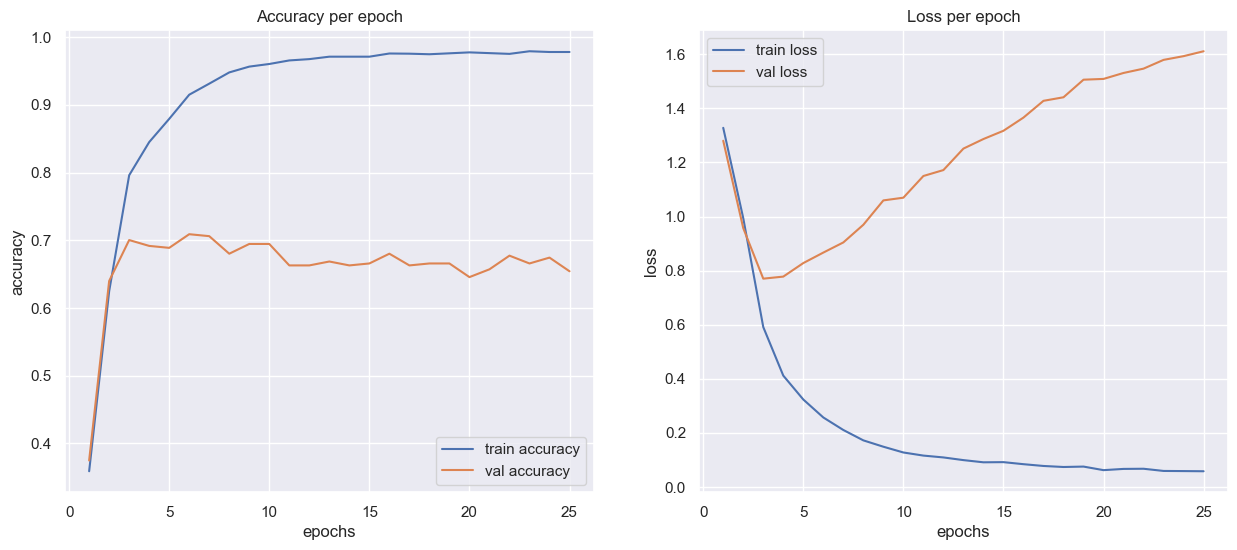

In [67]:
# importing package
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# create data
train_accuracy = training_log['accuracy']
val_accuracy = training_log['val_accuracy']
epoch = training_log['epoch']+1
  
# plot lines
axs[0].plot(epoch, train_accuracy, label = "train accuracy")
axs[0].plot(epoch, val_accuracy, label = "val accuracy")

axs[0].set_xlabel('epochs') 
axs[0].set_ylabel('accuracy') 
axs[0].set_title('Accuracy per epoch')

axs[0].legend()

train_loss = training_log['loss']
val_loss = training_log['val_loss']

axs[1].plot(epoch, train_loss, label = "train loss")
axs[1].plot(epoch, val_loss, label = "val loss")

axs[1].set_xlabel('epochs') 
axs[1].set_ylabel('loss') 
axs[1].set_title('Loss per epoch')

axs[1].legend()


plt.show()

### My Idea

Before epoch 3, the model is underfitting, the training and testing error are both high. But after epoch 3, the model memorized the training data and the noise. The model is overfitting, the testing error started to increase.

### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


### My Idea

1. Average of Word2Vec vectors : Take the average of all the word vectors in a sentence. This average vector can represent your sentence data.
2. Average of Word2Vec vectors with TF-IDF : We can also utilize TF-IDF and Word2Vec to represent the sentence. Take the word vectors and multiply it with their TF-IDF scores. The weighted average vector can represent the sentence vector.

### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [68]:
from gensim.models import KeyedVectors

model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

In [69]:
word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirsc

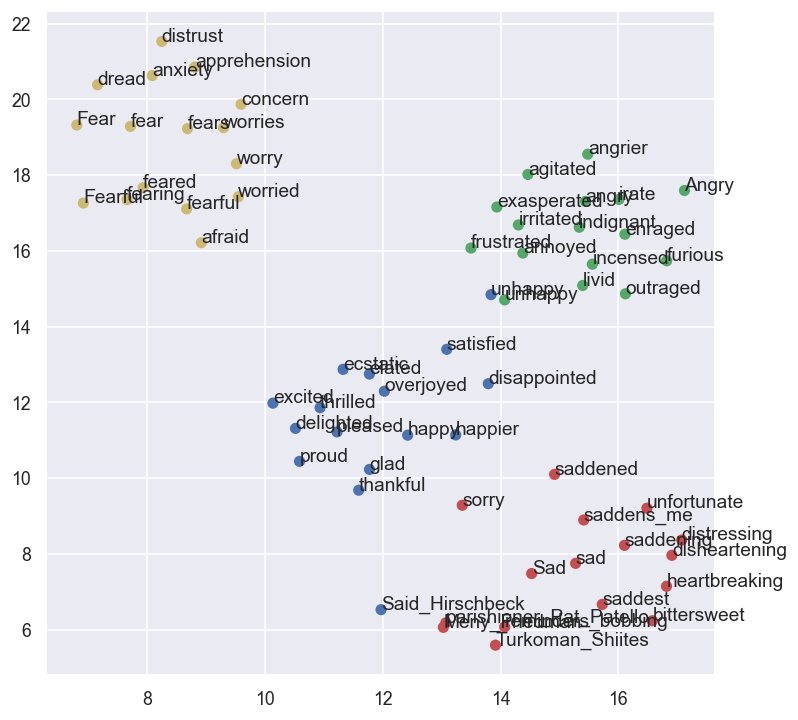

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# w2v model
model = w2v_google_model

# prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

# t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

# training
X_tsne = tsne.fit_transform(X_train)

# plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

## Third
The third part is in another notebook: Part3-kaggle-competition